In [85]:
#Mini-Project: An End-to-End Churn Prediction Model Using AWS
#https://github.com/springboard-curriculum/guild-mle-projects/blob/main/Student_MLE_MiniProject_Churn_Prediction_AWS.md


#pertinent Kaggle dataset: https://www.kaggle.com/datasets/uttamp/store-data

In [86]:
import boto3
import pandas as pd

# Initialize the SageMaker Feature Store Runtime client
featurestore_runtime = boto3.client('sagemaker-featurestore-runtime')

# Also use SageMaker client for feature group info if needed
sagemaker_client = boto3.client('sagemaker')

In [87]:
response = sagemaker_client.list_feature_groups()
print(response['FeatureGroupSummaries'])

[{'FeatureGroupName': 'FG-customer_churn-fd76c217', 'FeatureGroupArn': 'arn:aws:sagemaker:us-east-1:552631484635:feature-group/FG-customer_churn-fd76c217', 'CreationTime': datetime.datetime(2025, 6, 2, 23, 17, 37, 769000, tzinfo=tzlocal()), 'FeatureGroupStatus': 'Created'}, {'FeatureGroupName': 'FG-customer_churn-fbaa8d9d', 'FeatureGroupArn': 'arn:aws:sagemaker:us-east-1:552631484635:feature-group/FG-customer_churn-fbaa8d9d', 'CreationTime': datetime.datetime(2025, 6, 1, 2, 41, 54, 95000, tzinfo=tzlocal()), 'FeatureGroupStatus': 'Created'}, {'FeatureGroupName': 'FG-customer_churn-81fdc8f1', 'FeatureGroupArn': 'arn:aws:sagemaker:us-east-1:552631484635:feature-group/FG-customer_churn-81fdc8f1', 'CreationTime': datetime.datetime(2025, 6, 1, 3, 32, 11, 372000, tzinfo=tzlocal()), 'FeatureGroupStatus': 'Created'}, {'FeatureGroupName': 'FG-customer-churn-a0463f0c', 'FeatureGroupArn': 'arn:aws:sagemaker:us-east-1:552631484635:feature-group/FG-customer-churn-a0463f0c', 'CreationTime': datetime.

In [88]:
feature_group_name = 'FG-customer_churn-fd76c217'

response = sagemaker_client.describe_feature_group(FeatureGroupName=feature_group_name)
print(response)

{'FeatureGroupArn': 'arn:aws:sagemaker:us-east-1:552631484635:feature-group/FG-customer_churn-fd76c217', 'FeatureGroupName': 'FG-customer_churn-fd76c217', 'RecordIdentifierFeatureName': 'custid', 'EventTimeFeatureName': 'created', 'FeatureDefinitions': [{'FeatureName': 'custid', 'FeatureType': 'String'}, {'FeatureName': 'retained', 'FeatureType': 'Integral'}, {'FeatureName': 'created', 'FeatureType': 'String'}, {'FeatureName': 'firstorder', 'FeatureType': 'String'}, {'FeatureName': 'lastorder', 'FeatureType': 'String'}, {'FeatureName': 'esent', 'FeatureType': 'Fractional'}, {'FeatureName': 'eopenrate', 'FeatureType': 'Fractional'}, {'FeatureName': 'eclickrate', 'FeatureType': 'Fractional'}, {'FeatureName': 'avgorder', 'FeatureType': 'Fractional'}, {'FeatureName': 'ordfreq', 'FeatureType': 'Fractional'}, {'FeatureName': 'paperless', 'FeatureType': 'Integral'}, {'FeatureName': 'refill', 'FeatureType': 'Integral'}, {'FeatureName': 'doorstep', 'FeatureType': 'Integral'}, {'FeatureName': 'f

In [89]:
response = featurestore_runtime.get_record(
    FeatureGroupName='FG-customer_churn-fd76c217',
    RecordIdentifierValueAsString='known_custid_here'
)
print(response)


{'ResponseMetadata': {'RequestId': '190f4a58-aa13-4f96-b424-92accf843429', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amzn-requestid': '190f4a58-aa13-4f96-b424-92accf843429', 'content-type': 'application/json', 'content-length': '32', 'date': 'Fri, 06 Jun 2025 02:59:54 GMT'}, 'RetryAttempts': 0}}


In [90]:
# For FG 'FG-customer_churn-fd76c217' offline store Glue table:
offline_table_name = "fg_customer_churn_fd76c217_1748906257"
database_name = "sagemaker_featurestore"

In [91]:
# !pip install awswrangler

In [92]:
import awswrangler as wr

database_name = "sagemaker_featurestore"
table_name = "fg_customer_churn_52a9d9df_1748915994"

query = f"SELECT * FROM {database_name}.{table_name}"

df = wr.athena.read_sql_query(sql=query, database=database_name)

print(df.head())

INFO:awswrangler.athena._utils:Created CTAS table "sagemaker_featurestore"."temp_table_784f6dc0cacd4d968714b28fb77467a7"


   custid  retained     esent  eopenrate  eclickrate  avgorder   ordfreq  \
0  6GK8ZP         0  0.000000   0.000000    0.000000  0.640984  0.000000   
1  3TP9X8         1  2.029679   2.487752    0.835096  1.725406  0.000000   
2  GXDXR6         1  1.074536   0.000000    0.000000  3.230801  0.264197   
3  BE9KXP         0  0.000000   0.000000    0.000000  1.262921  0.000000   
4  SGU3PB         0  0.000000   0.000000    0.000000  1.159875  0.097385   

   paperless  refill  doorstep         favday           city  \
0          0       0         0  (8,[0],[1.0])  (5,[1],[1.0])   
1          0       0         0  (8,[3],[1.0])  (5,[1],[1.0])   
2          0       0         0  (8,[0],[1.0])  (5,[1],[1.0])   
3          0       0         0  (8,[2],[1.0])  (5,[1],[1.0])   
4          1       0         0  (8,[3],[1.0])  (5,[1],[1.0])   

            created_iso account_age_days              write_time  \
0  2010-05-30T00:00:00Z             5483 2025-06-03 02:11:43.205   
1  2010-05-05T00:00:00

In [93]:
import awswrangler as wr
import pandas as pd
import numpy as np
import xgboost as xgb
import json
from sklearn.model_selection import train_test_split  # Only for splitting - safe to use
from sklearn.metrics import accuracy_score, classification_report  # Only for evaluation

print(f"Using XGBoost version: {xgb.__version__}")

# Your existing data loading code
database_name = 'sagemaker_featurestore'
table_name = 'fg_customer_churn_52a9d9df_1748915994'

# Query full data
query = f"SELECT * FROM {database_name}.{table_name}"
df = wr.athena.read_sql_query(sql=query, database=database_name)

# Parse datetime
df['created_iso'] = pd.to_datetime(df['created_iso'])

# Feature engineering: extract date parts
df['created_year'] = df['created_iso'].dt.year
df['created_month'] = df['created_iso'].dt.month
df['created_day'] = df['created_iso'].dt.day

# Drop original datetime
df = df.drop(columns=['created_iso'])

# Convert account_age_days to numeric
df['account_age_days'] = pd.to_numeric(df['account_age_days'], errors='coerce').fillna(0)

# Columns for features and target
target = 'retained'
feature_cols = [
    'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq', 
    'paperless', 'refill', 'doorstep',
    'created_year', 'created_month', 'created_day',
    'account_age_days'
]

# Handle sparse vector columns
df = df.drop(columns=['favday', 'city'], errors='ignore')
feature_cols = [col for col in feature_cols if col not in ['favday', 'city']]

# ============================================================================
# JSON SERIALIZATION HELPER
# ============================================================================

def make_json_serializable(obj):
    """Convert numpy types to native Python types for JSON serialization"""
    if isinstance(obj, dict):
        return {key: make_json_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [make_json_serializable(item) for item in obj]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, pd.Timestamp):
        return obj.isoformat()
    else:
        return obj

# ============================================================================
# PREPROCESSING WITHOUT SKLEARN PIPELINES
# ============================================================================

def preprocess_data(df, feature_cols, target_col, fit_preprocessing=True, preprocessing_info=None):
    """
    Preprocess data without sklearn pipelines
    Returns processed data and preprocessing info for inference
    """
    
    X = df[feature_cols].copy()
    y = df[target_col] if target_col in df.columns else None
    
    if fit_preprocessing:
        # Store preprocessing info for inference
        preprocessing_info = {
            'feature_cols': feature_cols,
            'numeric_cols': [],
            'categorical_cols': [],
            'feature_stats': {},
            'categorical_mappings': {}
        }
        
        # Identify numeric and categorical columns
        for col in feature_cols:
            if X[col].dtype in ['int64', 'float64']:
                preprocessing_info['numeric_cols'].append(col)
                # Store stats for potential normalization - convert to native Python types
                preprocessing_info['feature_stats'][col] = {
                    'mean': float(X[col].mean()),
                    'std': float(X[col].std()),
                    'min': float(X[col].min()),
                    'max': float(X[col].max())
                }
            else:
                preprocessing_info['categorical_cols'].append(col)
                # Manual one-hot encoding mapping
                unique_vals = X[col].unique()
                preprocessing_info['categorical_mappings'][col] = [str(val) for val in unique_vals]
        
        print(f"Numeric columns: {preprocessing_info['numeric_cols']}")
        print(f"Categorical columns: {preprocessing_info['categorical_cols']}")
    
    # Handle categorical columns manually (if any)
    for col in preprocessing_info['categorical_cols']:
        if col in X.columns:
            # Simple label encoding for XGBoost (can handle categorical features)
            unique_vals = preprocessing_info['categorical_mappings'][col]
            X[col] = X[col].map({val: i for i, val in enumerate(unique_vals)})
    
    # Handle missing values
    X = X.fillna(0)
    
    return X, y, preprocessing_info

# Preprocess the data
X, y, preprocessing_info = preprocess_data(df, feature_cols, target, fit_preprocessing=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))

# ============================================================================
# TRAIN XGBOOST MODEL (NO SKLEARN PIPELINE)
# ============================================================================

print("\n🚀 Training XGBoost model...")

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'verbosity': 1
}

# Train the model
num_rounds = 100
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=10
)

print("✅ Model training completed!")

# ============================================================================
# EVALUATE MODEL
# ============================================================================

# Make predictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\n📊 Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ============================================================================
# SAVE MODEL FOR DEPLOYMENT (NO SKLEARN DEPENDENCIES)
# ============================================================================

print("\n💾 Saving model files...")

# 1. Save XGBoost model in native format
model.save_model('xgboost_model.json')
print("✅ Saved xgboost_model.json")

# 2. Save preprocessing info for inference - FIXED: Convert numpy types
preprocessing_info_serializable = make_json_serializable(preprocessing_info)
with open('feature_info.json', 'w') as f:
    json.dump(preprocessing_info_serializable, f, indent=2)
print("✅ Saved feature_info.json")

# 3. Save model metadata - FIXED: Convert numpy types
model_metadata = {
    'model_type': 'xgboost',
    'version': xgb.__version__,
    'training_samples': int(len(X_train)),  # Convert to int
    'test_samples': int(len(X_test)),       # Convert to int
    'accuracy': float(accuracy),            # Convert to float
    'feature_count': int(len(feature_cols)), # Convert to int
    'target_column': target,
    'training_date': pd.Timestamp.now().isoformat()
}

model_metadata_serializable = make_json_serializable(model_metadata)
with open('model_metadata.json', 'w') as f:
    json.dump(model_metadata_serializable, f, indent=2)
print("✅ Saved model_metadata.json")

# 4. Create a simple test sample for deployment testing - FIXED: Convert numpy types
test_sample = X_test.iloc[0:1].to_dict('records')[0]
test_sample_serializable = make_json_serializable(test_sample)
with open('test_sample.json', 'w') as f:
    json.dump(test_sample_serializable, f, indent=2)
print("✅ Saved test_sample.json")

print(f"\n🎯 Files ready for deployment:")
print("   - xgboost_model.json (main model)")
print("   - feature_info.json (preprocessing info)")
print("   - model_metadata.json (model info)")
print("   - test_sample.json (for testing)")

# ============================================================================
# FEATURE IMPORTANCE
# ============================================================================

print("\n📈 Feature Importance:")
importance = model.get_score(importance_type='weight')
for feature, score in sorted(importance.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature}: {score}")

print("\n✅ Training pipeline completed successfully!")
print("🚀 Ready to deploy with pure XGBoost container!")

Using XGBoost version: 2.1.4


INFO:awswrangler.athena._utils:Created CTAS table "sagemaker_featurestore"."temp_table_d63c9096c1ff4342b77f202cb364b809"


Numeric columns: ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq']
Categorical columns: ['paperless', 'refill', 'doorstep', 'created_year', 'created_month', 'created_day', 'account_age_days']
Number of training samples: 24606
Number of test samples: 6152

🚀 Training XGBoost model...
[0]	train-logloss:0.44302	test-logloss:0.44232
[10]	train-logloss:0.23031	test-logloss:0.23210
[20]	train-logloss:0.16186	test-logloss:0.16436
[30]	train-logloss:0.13662	test-logloss:0.14038
[40]	train-logloss:0.12537	test-logloss:0.13018
[50]	train-logloss:0.11973	test-logloss:0.12674
[60]	train-logloss:0.11563	test-logloss:0.12397
[70]	train-logloss:0.11296	test-logloss:0.12283
[80]	train-logloss:0.11051	test-logloss:0.12216
[90]	train-logloss:0.10857	test-logloss:0.12225
✅ Model training completed!

📊 Model Performance:
Accuracy: 0.9550

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      1249
         1.0       0.96    

In [94]:
# 2. Evaluate your model by calculating the AUC ROC metric on a test dataset.
y_probs = model.predict(dtest)  # This is already probability of class 1
auc_roc = roc_auc_score(y_test, y_probs)
print("Test AUC ROC:", auc_roc)


Test AUC ROC: 0.977929151397806


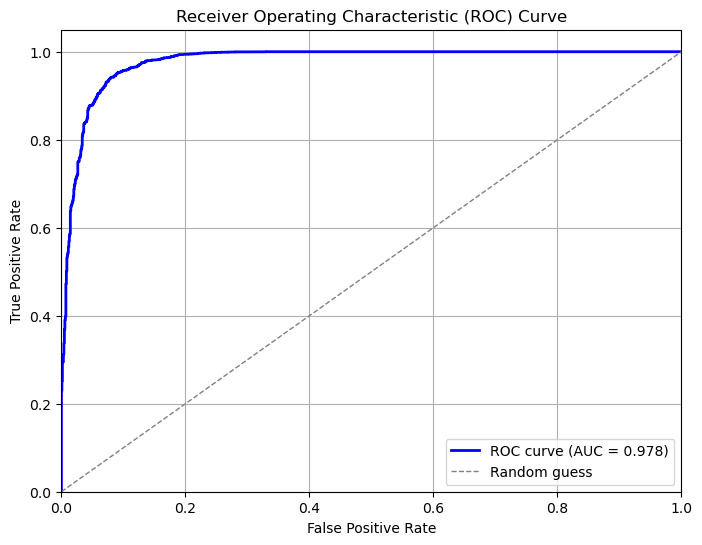

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_probs = model.predict(dtest)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


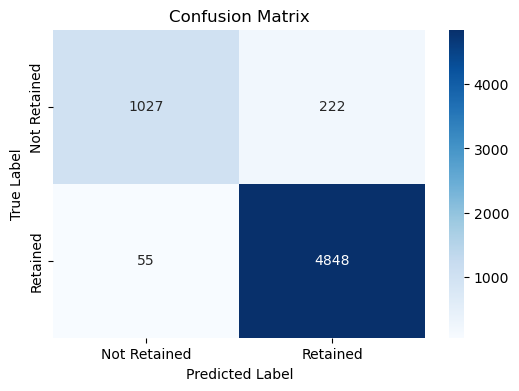

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test data (use DMatrix)
y_pred_probs = model.predict(dtest)
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Retained', 'Retained'],
            yticklabels=['Not Retained', 'Retained'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [97]:
import sagemaker
import tarfile
import time
import os
import boto3
from sagemaker.xgboost import XGBoostModel
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer
import logging
import json

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def create_inference_script():
    """Create the fixed inference script"""
    inference_code = '''import json
import os
import logging
import xgboost as xgb
import numpy as np

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def model_fn(model_dir):
    """Load the XGBoost model from the model directory."""
    try:
        logger.info(f"Loading model from {model_dir}")
        
        # List all files in model directory for debugging
        all_files = os.listdir(model_dir)
        logger.info(f"Files in model directory: {all_files}")
        
        model_path = os.path.join(model_dir, 'xgboost_model.json')
        
        if not os.path.exists(model_path):
            logger.error(f"Model file not found at {model_path}")
            raise FileNotFoundError(f"Model file not found at {model_path}")
        
        # Load XGBoost model
        model = xgb.Booster()
        model.load_model(model_path)
        logger.info("Successfully loaded XGBoost model")
        return model
        
    except Exception as e:
        logger.error(f"Error loading model: {str(e)}")
        raise

def input_fn(request_body, request_content_type='application/json'):
    """Parse input data for inference."""
    try:
        logger.info(f"Processing input with content type: {request_content_type}")
        
        if request_content_type != 'application/json':
            raise ValueError(f"Unsupported content type: {request_content_type}")
        
        # Parse JSON input
        if isinstance(request_body, str):
            input_data = json.loads(request_body)
        else:
            input_data = request_body
            
        logger.info(f"Parsed input data: {input_data}")
        
        # Handle different input formats
        if isinstance(input_data, dict):
            # Single prediction dictionary - convert to list
            input_data = [input_data]
        elif not isinstance(input_data, list):
            raise ValueError(f"Input must be a dictionary or list. Got: {type(input_data)}")
        
        # Expected features in exact order from training
        expected_features = [
            'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq', 
            'paperless', 'refill', 'doorstep', 'created_year', 
            'created_month', 'created_day', 'account_age_days'
        ]
        
        features_list = []
        for item in input_data:
            if not isinstance(item, dict):
                raise ValueError(f"Each input item must be a dictionary. Got: {type(item)}")
            
            # Extract features in exact order
            features = []
            for feature_name in expected_features:
                value = item.get(feature_name, 0.0)  # Default to 0.0 if missing
                try:
                    features.append(float(value))
                except (ValueError, TypeError):
                    logger.warning(f"Could not convert {feature_name}={value} to float, using 0.0")
                    features.append(0.0)
            
            features_list.append(features)
            logger.info(f"Extracted features: {features}")
        
        # Convert to numpy array and create DMatrix
        features_array = np.array(features_list, dtype=np.float32)
        logger.info(f"Created features array with shape: {features_array.shape}")
        
        dmatrix = xgb.DMatrix(features_array)
        logger.info(f"Created DMatrix successfully")
        
        return dmatrix
        
    except Exception as e:
        logger.error(f"Error in input_fn: {str(e)}")
        raise

def predict_fn(input_data, model):
    """Make prediction using the loaded model."""
    try:
        logger.info("Making prediction...")
        
        # Make prediction
        predictions = model.predict(input_data)
        logger.info(f"Predictions: {predictions}")
        
        return predictions
        
    except Exception as e:
        logger.error(f"Error in predict_fn: {str(e)}")
        raise

def output_fn(predictions, accept='application/json'):
    """Format the prediction output."""
    try:
        logger.info(f"Formatting output with accept type: {accept}")
        
        # Convert predictions to proper format
        if isinstance(predictions, np.ndarray):
            pred_list = predictions.tolist()
        else:
            pred_list = [float(predictions)]
        
        # Create simple output format
        result = {
            'predictions': pred_list
        }
        
        logger.info(f"Final output: {result}")
        return json.dumps(result)
        
    except Exception as e:
        logger.error(f"Error in output_fn: {str(e)}")
        raise
'''
    
    with open('inference_fixed.py', 'w') as f:
        f.write(inference_code)
    
    print("✅ Created inference_fixed.py")

def cleanup_old_endpoints():
    """Clean up old endpoints"""
    try:
        sm_client = boto3.client('sagemaker')
        response = sm_client.list_endpoints()
        
        endpoints_to_delete = []
        for endpoint in response['Endpoints']:
            endpoint_name = endpoint['EndpointName']
            if 'churn-fixed' in endpoint_name and endpoint['EndpointStatus'] == 'InService':
                endpoints_to_delete.append(endpoint_name)
        
        print(f"Found {len(endpoints_to_delete)} endpoints to clean up")
        
        for endpoint_name in endpoints_to_delete:
            try:
                print(f"Deleting {endpoint_name}...")
                sm_client.delete_endpoint(EndpointName=endpoint_name)
                time.sleep(5)  # Brief pause between deletions
            except Exception as e:
                print(f"Could not delete {endpoint_name}: {e}")
                
    except Exception as e:
        print(f"Error cleaning up endpoints: {e}")

def create_new_deployment():
    """Create a completely new deployment with the fixed script"""
    print("🔧 Creating new deployment with fixed inference script...")
    
    # Create the fixed inference script
    create_inference_script()
    
    # Verify required files exist
    required_files = ['xgboost_model.json', 'inference_fixed.py']
    for file in required_files:
        if not os.path.exists(file):
            print(f"❌ {file} not found!")
            return None, None
    
    try:
        # Create model archive with fixed script
        print("📦 Creating model.tar.gz with fixed inference script...")
        with tarfile.open('model_fixed.tar.gz', 'w:gz') as tar:
            tar.add('xgboost_model.json')
            tar.add('inference_fixed.py')
        
        print("✅ Model archive created")
        
        # Verify archive contents
        with tarfile.open('model_fixed.tar.gz', 'r:gz') as tar:
            members = tar.getnames()
            print(f"Archive contains: {members}")
        
        # Initialize SageMaker
        sagemaker_session = sagemaker.Session()
        role = sagemaker.get_execution_role()
        
        # Upload to S3
        bucket = sagemaker_session.default_bucket()
        prefix = f'churn-xgboost-final-{int(time.time())}'
        
        model_s3_path = sagemaker_session.upload_data(
            path='model_fixed.tar.gz',
            bucket=bucket,
            key_prefix=prefix
        )
        print(f"✅ Model uploaded to: {model_s3_path}")
        
        # Create XGBoost model with fixed entry point
        xgb_model = XGBoostModel(
            model_data=model_s3_path,
            role=role,
            entry_point='inference_fixed.py',
            framework_version='1.7-1',
            py_version='py3',
            sagemaker_session=sagemaker_session
        )
        
        # Deploy with a new name
        endpoint_name = f'churn-final-{int(time.time())}'
        print(f"🚀 Deploying endpoint: {endpoint_name}")
        print("⏳ This will take 5-10 minutes...")
        
        predictor = xgb_model.deploy(
            initial_instance_count=1,
            instance_type='ml.m5.large',
            endpoint_name=endpoint_name,
            serializer=JSONSerializer(),
            deserializer=JSONDeserializer(),
            wait=True
        )
        
        print("✅ Deployment completed!")
        return predictor, endpoint_name
        
    except Exception as e:
        print(f"❌ Deployment failed: {str(e)}")
        logger.exception("Full deployment error:")
        return None, None

def test_endpoint_comprehensive(predictor):
    """Comprehensive endpoint testing"""
    print("\n🧪 Testing endpoint...")
    
    # Test data that matches your training features exactly
    test_data = {
        'esent': 15.0,
        'eopenrate': 0.25,
        'eclickrate': 0.05,
        'avgorder': 45.0,
        'ordfreq': 2.0,
        'paperless': 1.0,
        'refill': 0.0,
        'doorstep': 1.0,
        'created_year': 2023.0,
        'created_month': 6.0,
        'created_day': 15.0,
        'account_age_days': 365.0
    }
    
    try:
        print("🔍 Testing single prediction...")
        result = predictor.predict(test_data)
        print(f"✅ Single prediction successful: {result}")
        
        print("🔍 Testing batch prediction...")
        batch_data = [test_data, test_data]
        batch_result = predictor.predict(batch_data)
        print(f"✅ Batch prediction successful: {batch_result}")
        
        return True
        
    except Exception as e:
        print(f"❌ Test failed: {str(e)}")
        logger.exception("Full test error:")
        return False

def main():
    """Main execution function"""
    print("🔧 SageMaker XGBoost Endpoint - Complete Fix")
    print("=" * 60)
    
    # Step 1: Clean up old endpoints (optional)
    print("\nStep 1: Cleaning up old endpoints...")
    cleanup_old_endpoints()
    
    # Step 2: Create new deployment
    print("\nStep 2: Creating new deployment...")
    predictor, endpoint_name = create_new_deployment()
    
    if predictor and endpoint_name:
        print(f"\n🎯 New endpoint deployed: {endpoint_name}")
        
        # Step 3: Test the endpoint
        print("\nStep 3: Testing the endpoint...")
        if test_endpoint_comprehensive(predictor):
            print("\n✅ SUCCESS! Endpoint is working correctly.")
            print(f"📋 Working endpoint name: {endpoint_name}")
            
            # Show usage example
            print("\n📖 Usage examples:")
            print("# Single prediction:")
            print("result = predictor.predict({")
            print("    'esent': 10.0, 'eopenrate': 0.2, 'eclickrate': 0.03,")
            print("    'avgorder': 35.0, 'ordfreq': 1.5, 'paperless': 0.0,")
            print("    'refill': 1.0, 'doorstep': 1.0, 'created_year': 2024.0,")
            print("    'created_month': 1.0, 'created_day': 15.0, 'account_age_days': 150.0")
            print("})")
            
            return predictor, endpoint_name
        else:
            print("\n⚠️ Tests failed. Check CloudWatch logs.")
            print(f"💡 Check logs at: /aws/sagemaker/Endpoints/{endpoint_name}")
            
    else:
        print("\n❌ Failed to create deployment")
        
    return None, None

if __name__ == "__main__":
    predictor, endpoint_name = main()

🔧 SageMaker XGBoost Endpoint - Complete Fix

Step 1: Cleaning up old endpoints...
Found 4 endpoints to clean up
Deleting churn-fixed-1749178193...
Deleting churn-fixed-1749177538...
Deleting churn-fixed-1749176588...
Deleting churn-fixed-1749175766...

Step 2: Creating new deployment...
🔧 Creating new deployment with fixed inference script...
✅ Created inference_fixed.py
📦 Creating model.tar.gz with fixed inference script...
✅ Model archive created
Archive contains: ['xgboost_model.json', 'inference_fixed.py']


INFO:sagemaker.image_uris:Ignoring unnecessary instance type: ml.m5.large.
INFO:sagemaker:Creating model with name: sagemaker-xgboost-2025-06-06-03-00-46-496


✅ Model uploaded to: s3://sagemaker-us-east-1-552631484635/churn-xgboost-final-1749178846/model_fixed.tar.gz
🚀 Deploying endpoint: churn-final-1749178846
⏳ This will take 5-10 minutes...


INFO:sagemaker:Creating endpoint-config with name churn-final-1749178846
INFO:sagemaker:Creating endpoint with name churn-final-1749178846


-------!✅ Deployment completed!

🎯 New endpoint deployed: churn-final-1749178846

Step 3: Testing the endpoint...

🧪 Testing endpoint...
🔍 Testing single prediction...


ERROR:__main__:Full test error:
Traceback (most recent call last):
  File "/tmp/ipykernel_1628/1638207095.py", line 280, in test_endpoint_comprehensive
    result = predictor.predict(test_data)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/sagemaker/base_predictor.py", line 212, in predict
    response = self.sagemaker_session.sagemaker_runtime_client.invoke_endpoint(**request_args)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/botocore/client.py", line 569, in _api_call
    return self._make_api_call(operation_name, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.12/site-packages/botocore/client.py", line 1023, in _make_api_call
    raise error_class(parsed_response, operation_name)
botocore.errorfactory.ModelError: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received ser

❌ Test failed: An error occurred (ModelError) when calling the InvokeEndpoint operation: Received server error (500) from primary with message "<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>
". See https://us-east-1.console.aws.amazon.com/cloudwatch/home?region=us-east-1#logEventViewer:group=/aws/sagemaker/Endpoints/churn-final-1749178846 in account 552631484635 for more information.

⚠️ Tests failed. Check CloudWatch logs.
💡 Check logs at: /aws/sagemaker/Endpoints/churn-final-1749178846


In [98]:
def cleanup_endpoint(endpoint_name):
    """Clean up the endpoint to avoid charges"""
    
    print(f"🧹 Cleaning up endpoint: {endpoint_name}")
    
    try:
        sm_client = boto3.client('sagemaker')
        sm_client.delete_endpoint(EndpointName=endpoint_name)
        sm_client.delete_endpoint_config(EndpointConfigName=endpoint_name)
        print("✅ Endpoint cleaned up successfully!")
    except Exception as e:
        print(f"❌ Cleanup failed: {e}")

In [99]:
cleanup_endpoint(endpoint_name)

🧹 Cleaning up endpoint: None
❌ Cleanup failed: Parameter validation failed:
Invalid type for parameter EndpointName, value: None, type: <class 'NoneType'>, valid types: <class 'str'>
